# Pandas rolling

In [11]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import fix_yahoo_finance as yf  
import seaborn as sns
%matplotlib inline

In [12]:
# set today to today
today = str(dt.datetime.today()).split()[0]
today

'2018-10-14'

In [13]:
company = "^GSPC"  # this is 
start = "2017-01-01"
end = today

# download dataframe
stocks = pdr.get_data_yahoo(company, start = start, end = end)

# download Panel
# data = pdr.get_data_yahoo(["SPY", "IWM"], start = start, end = end)

stocks.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000,2257.830078
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000,2270.750000
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000,2269.000000
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000,2276.979980
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000,2268.899902


In [14]:
idx = stocks.loc['2017-01-01':today].index  # grab the index you concern with
stock_price = stocks.loc['2017-01-01':today]['Adj Close']  # grab the price you concern with

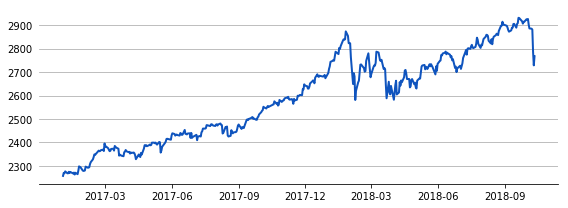

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(8,3)
ax.plot_date(idx,stock_price, '-', c=(15/250,82/250,186/250), lw=2)  # '-' creates a line and set the RGB color of the line
ax.yaxis.grid(True)
ax.yaxis.set_ticks_position('none') # remove ticks
#ax.set_ylim([1000,2200]) # set ylim and xlim
plt.tight_layout()
sns.despine(left=True, bottom=False, right=True, top=True) # remove left, right and top box line

In [20]:
stocks.rolling(window = 7).mean().head(14)
# The first value appeared is the mean of the first seven row 
# There was not enough data to calcurate first six data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-11,2274.340018,2260.891427,2266.342878,2269.668562,3.587706e+09,2269.668562
2017-01-12,2275.468610,2262.194301,2269.138567,2271.469971,3.543649e+09,2271.469971
2017-01-13,2276.305734,2263.610003,2270.729980,2272.025670,3.445989e+09,2272.025670


### 7 days moving average

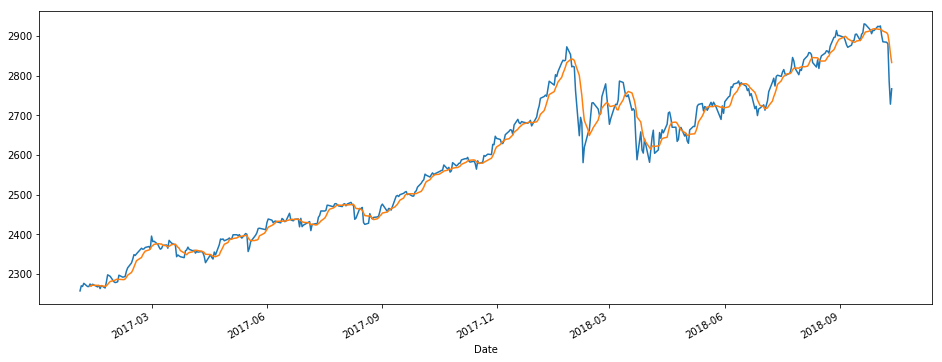

In [23]:
stocks['Close'].plot()
stocks.rolling(window = 7).mean()['Close'].plot(figsize = (16,6))

### 30 days moving average

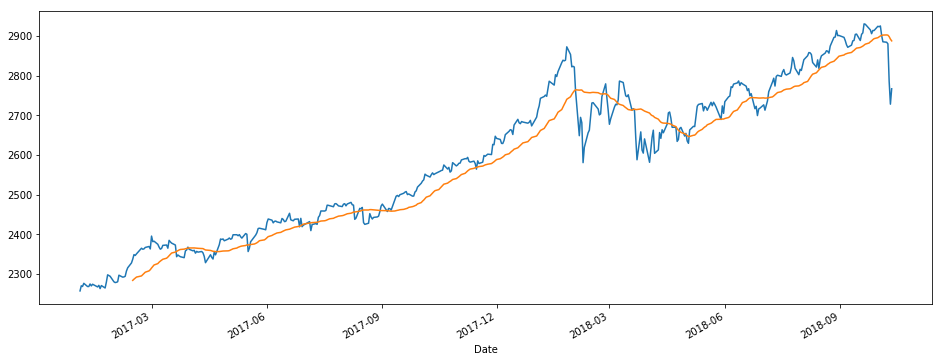

In [24]:
stocks['Close'].plot()
stocks.rolling(window = 30).mean()['Close'].plot(figsize = (16,6))

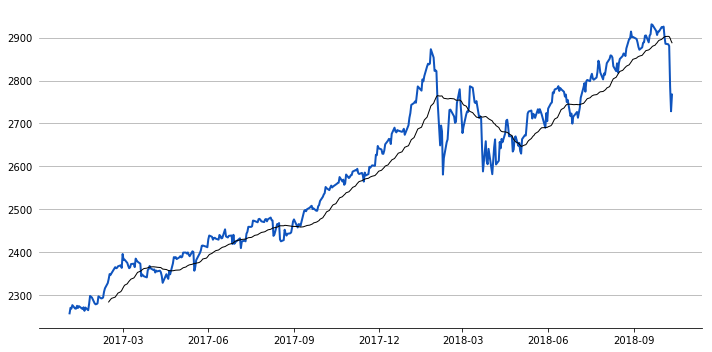

In [38]:
stocks['30 Day MA'] = stocks['Close'].rolling(window = 30).mean()

fig, ax = plt.subplots()
fig.set_size_inches(10,5)
ax.plot_date(idx,stock_price, '-', c=(15/250,82/250,186/250), lw=2)  # '-' creates a line and set the RGB color of the line
ax.plot_date(idx,stocks['30 Day MA'], '-', c='black', lw=1)
ax.yaxis.grid(True)
ax.yaxis.set_ticks_position('none') # remove ticks
#ax.set_ylim([1000,2200]) # set ylim and xlim
plt.tight_layout()
sns.despine(left=True, bottom=False, right=True, top=True) # remove left, right and top box line

## 90 days moving average

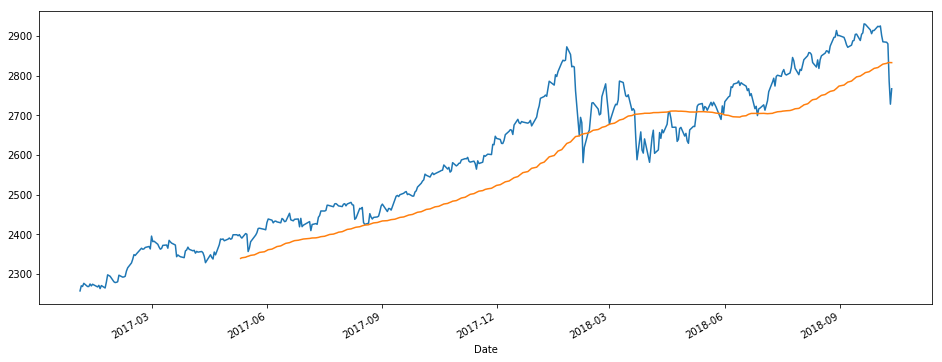

In [29]:
stocks['Close'].plot()
stocks.rolling(window = 90).mean()['Close'].plot(figsize = (16,6))

## Expanding

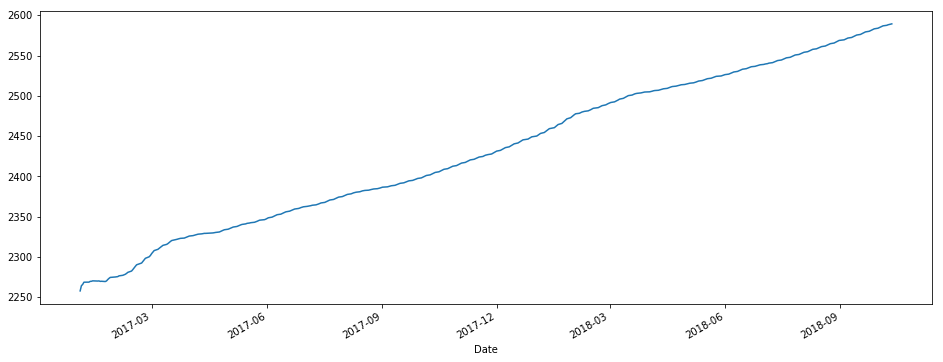

In [43]:
# Average of all value before
stocks['Close'].expanding(min_periods = 1).mean().plot(figsize=(16,6)) 

# Bollinger bands
price with moving average, upper and lower std bands 

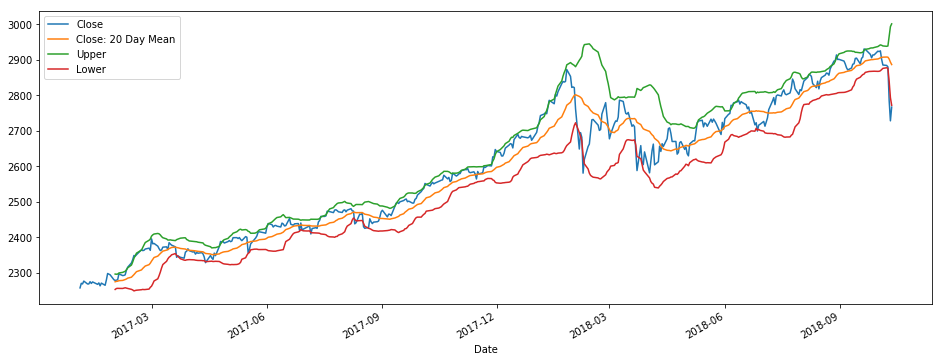

In [47]:
# Close 20 MA
stocks['Close: 20 Day Mean'] = stocks['Close'].rolling(window = 20).mean()

# Upper = 20MA + 2*std(20)
stocks['Upper'] = stocks['Close: 20 Day Mean'] + 2*(stocks['Close'].rolling(window = 20).std())

# Lower = 20MA - 2*std(20)
stocks['Lower'] = stocks['Close: 20 Day Mean'] - 2*(stocks['Close'].rolling(window = 20).std())

#Close
stocks[['Close', 'Close: 20 Day Mean', 'Upper', 'Lower']].plot(figsize=(16,6))

## Tail of the last 150 days

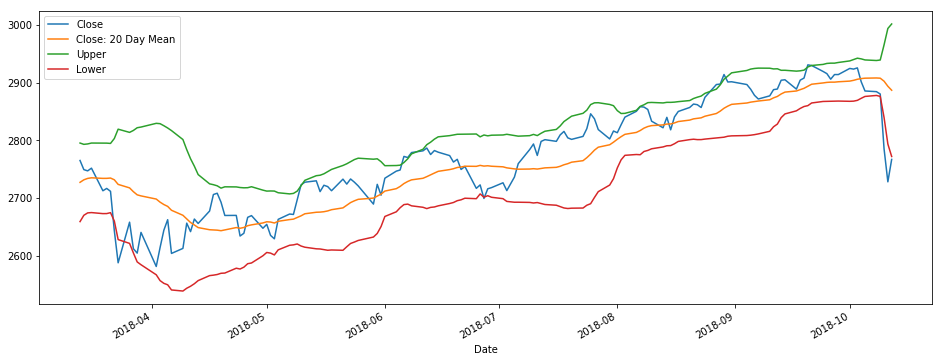

In [49]:
# Close 20 MA
stocks['Close: 20 Day Mean'] = stocks['Close'].rolling(window = 20).mean()

# Upper = 20MA + 2*std(20)
stocks['Upper'] = stocks['Close: 20 Day Mean'] + 2*(stocks['Close'].rolling(window = 20).std())

# Lower = 20MA - 2*std(20)
stocks['Lower'] = stocks['Close: 20 Day Mean'] - 2*(stocks['Close'].rolling(window = 20).std())

#Close
stocks[['Close', 'Close: 20 Day Mean', 'Upper', 'Lower']].tail(150).plot(figsize=(16,6))